![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Continuum Multiphysics in the Geosciences**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics


# Constrained minimization, Lagrange multipliers

These are some thoughts to help introduce the notion of Lagrange multipliers in optimization problems. We want to understand (among many other things)

* why we can simply add constraints multiplied by Lagrange multipliers to objective functions to find constrained extrema,
* how Lagrange multipliers are related to the Lagrangian formalism in mechanics,
* why they are often interpreted as (generalized, thermodynamic) reaction forces to constraints.

## Intuitive (geometric) motivation

Consider the function $f(x,y)$ which we wish to minimize by finding $\nabla f = \mathbf{0}$. At the same time we want to fulfill some constraint $g(x,y) = 0$.

To be more specific, we choose the functions

\begin{align}
    f(x,y) &= 1 + 0.8 x^2 + 0.3 y^2
    \\
    g(x,y) &= 2 + 0.6x
\end{align}

here.

In [13]:
p = lambda x,y: 1.+0.8*x**2 + 0.3*y**2
g = lambda x: 0.6*x +2

Let's plot them in 3D along with some isolines projected onto the $x-y$ plane.

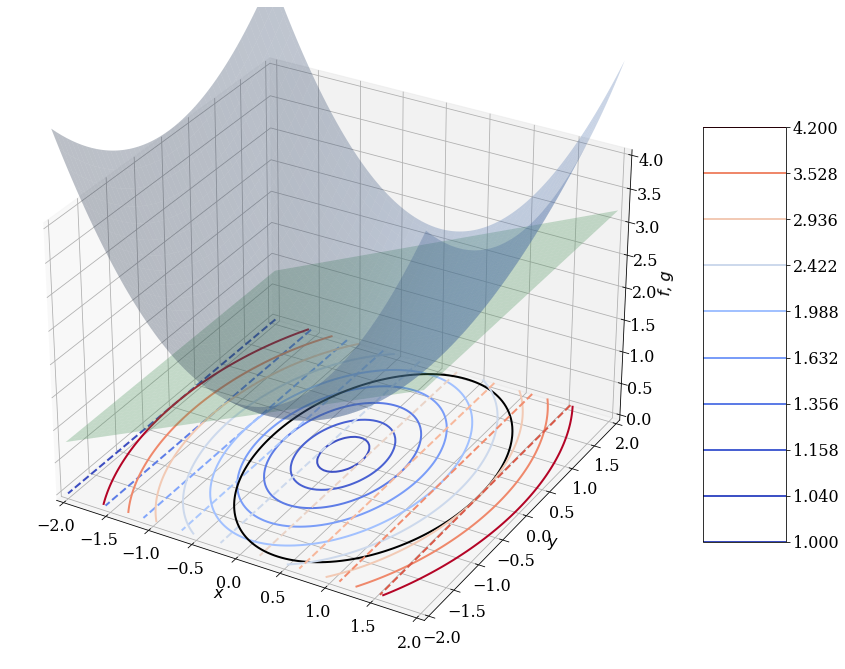

In [14]:
#HIDDEN
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
A = np.linspace(-2, 2, 100) # resolution of the contour
X,Y = np.meshgrid(A,A)
surf = ax.plot_surface(X, Y, p(X,Y), alpha=0.3)
constr = ax.plot_surface(X, Y, g(X), alpha=0.3)
ax.set_xlabel('$x$')
ax.set_xlim(-2, 2)
ax.set_ylabel('$y$')
ax.set_ylim(-2, 2)
ax.set_zlabel('$f$, $g$')
ax.set_zlim(0, 4)
fig.tight_layout()
cset = ax.contour(X, Y, p(X,Y), zdir='z', levels = p(np.linspace(0, 2, 10),0), offset=0, cmap=cm.coolwarm)
cset2 = ax.contour(X, Y, g(X), zdir='z', levels = g(np.linspace(-2, 2, 10)), offset=0, cmap=cm.coolwarm,linestyles='dashed')
cset3 = ax.contour(X, Y, p(X,Y)-g(X), levels = [0],colors = ['black'])
fig.colorbar(cset, shrink=0.5, aspect=5)
fig.tight_layout()

The black line shows the intersecting curve between both surfaces.

To understand a little bit better what's going on, let's draw gradients with the isolines. Remember, that gradients indicate the direction of steepest ascent. We want to walk into the valley, i.e. opposite to the gradient vectors.

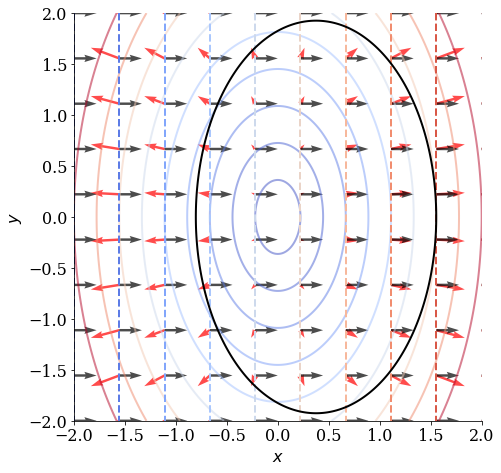

In [15]:
#HIDDEN
p = lambda x,y: 1.+0.8*x**2 + 0.3*y**2
g = lambda x: 0.6*x +2

c = lambda x: np.sqrt(10/3*(1+0.6*x-0.8*x*x))

fig, ax = plt.subplots(figsize=(7,7))
#ax = fig.gca(projection='3d')
A = np.linspace(-2, 2, 1000) # resolution of the contour
X,Y = np.meshgrid(A,A)
cset = ax.contour(X, Y, p(X,Y), levels = p(np.linspace(0, 2, 10),0), cmap=cm.coolwarm,alpha=0.5)
cset = ax.contour(X, Y, g(X), levels = g(np.linspace(-2, 2, 10)), linestyles='dashed', cmap=cm.coolwarm)
cset = ax.contour(X, Y, p(X,Y)-g(X), levels = [0],colors = ['black'])
B = np.linspace(-2, 2, 10) 
Xv,Yv = np.meshgrid(B,B)


grad_p_x = 1.6*Xv
grad_p_y = 0.6*Yv

grad_g_x = 0.6
grad_g_y = 0

vec = ax.quiver(Xv, Yv, grad_p_x, grad_p_y, pivot='tail', alpha=0.7, ls='-', lw=2,color='red')
vec2 = ax.quiver(Xv, Yv, grad_g_x, grad_g_y, pivot='tail', alpha=0.7, ls='-', lw=2)
#vec = ax.quiver(Xv, -c(Xv), grad_g_x, grad_g_y, pivot='tail', alpha=0.3, ls='-', lw=2)
#ax.quiverkey(vec2, 0, 1.5, 10, '$\\nabla g$')
ax.set_xlabel('$x$')
ax.set_xlim(-2, 2)
ax.set_ylabel('$y$')
ax.set_ylim(-2, 2)
#ax.legend()
ax.set_aspect('equal')
fig.tight_layout()

fig.savefig('constrained_minimum_grad.pdf')

The red arrows represent $\nabla f$, the black arrows $\nabla g$. From this picture, we can now read two conditions for the minizer $(x^*,y^*)$ of $f$ subject to $g = 0$. Firstly

$$
    g(x^*,y^*) = 0
$$

needs to hold, i.e. we need to be on the black curve. Secondly, for our minimum we find that the gradient vectors are parallel but opposite (aligned for a maximum), i.e.:

$$
    \nabla f |_{x^*,y^*} = - \lambda \nabla g |_{x^*,y^*}
$$

In other words, the vectors pointing "downhill", $-\nabla f$, and the gradient of the constraint, $\nabla g$, are parallel and differ only by a scalar multiplier $\lambda$.

All conditions can be satisfied by defining a functional $L(x,y,\lambda) = f(x,y) + \lambda g(x,y)$ for which we seek the optimum:

$$
    \text{grad} L = \mathbf{0} = 
    \begin{pmatrix}
        \frac{\partial L}{\partial x} 
        \\
        \frac{\partial L}{\partial y} 
        \\
        \frac{\partial L}{\partial \lambda} 
    \end{pmatrix}
    = 
    \begin{pmatrix}
        \frac{\partial f}{\partial x} + \lambda \frac{\partial g}{\partial x}
        \\
        \frac{\partial f}{\partial y} + \lambda \frac{\partial g}{\partial y}
        \\
        g(x,y)
    \end{pmatrix}
$$

Thus we see, why and how a function can be minimized in light of certain constraints.

## Lagrange formalism with a physical example

Now let's connect this to the Lagrangian formalism known from mechanics.

### Introduction

The Lagrangian function (also see Noether's theorem or the stationary action principle) is defined as

$$
	L \equiv E_\text{kin} - E_\text{pot}
$$

and the Euler-Lagrange equation as

$$
	\frac{\text{d}}{\text{d}t}\frac{\partial L}{\partial \dot{\mathbf{x}}} = \frac{\partial L}{\partial \mathbf{x}}
$$

Consider a particle with constant mass moving in the potential $V(\mathbf{x})$, then applying the usual formalism to the Lagrangian

$$
	L = \frac{m}{2} \dot{\mathbf{x}} \cdot \dot{\mathbf{x}} - V(\mathbf{x})
$$

yields

$$
	\frac{\text{d}m \dot{\mathbf{x}}}{\text{d}t} = - \text{grad}\,V \quad \mbox{or} \quad \dot{\mathbf{p}} = m \ddot{\mathbf{x}} = \mathbf{F}
$$

i.e. the Euler-Lagrange equation recovers Newton's law.


### Constraints

We now proceed from a vector of generalized coordinates $\mathbf{q}$. For every constraint $\mathbf{c}(\mathbf{q}) = 0$ a (steep) force potential can be added that allows the calculation of a reaction force:
$$
	L_\text{c} = E_\text{kin} - E_\text{pot} - V_\text{c} = L - V_\text{c}(\mathbf{c})
	\quad \mbox{so that} \quad
	\frac{\text{d}}{\text{d}t} \frac{\partial L}{\partial \dot{\mathbf{q}}} = \frac{\partial L}{\partial \mathbf{q}} - \frac{\partial V_\text{c}}{\partial \mathbf{c}} \frac{\partial \mathbf{c}}{\partial \mathbf{q}} = \frac{\partial L}{\partial \mathbf{q}} + \mathbf{F}_c \frac{\partial \mathbf{c}}{\partial \mathbf{q}}
$$
Note, that the constraint (direction, magnitude) must be defined carefully to yield the desired reaction force. One also sees, that the reaction force has the role of a Lagrange multiplier.

Note: Non-conservative forces (like friction) can only be added manually once the equations of motion have been derived from the Lagrangian (using the $F=ma$ analogy).

Hence, one can write in a general sense

$$
	\frac{\text{d}}{\text{d}t} \frac{\partial L}{\partial \dot{\mathbf{q}}} - \frac{\partial L}{\partial \mathbf{q}} + \frac{\partial V_\text{c}}{\partial \mathbf{q}} = \mathbf{f}_\text{nc}
$$


<img src="https://github.com/nagelt/Numerical_Methods_Introduction/raw/master/Images/spring_slide.png" style="width: 300px;"/>

As an **example** consider the spring-pendulum-in-a-slide system as shown the figure. Sliding is frictionless, the spring is force-free at extension $l$. The coordinates $x$ and $y$ locate the point mass $m$.

**Option 1**: Seeing that the system has one DOF, one can directly write:

$$
	L = \frac{m}{2} \dot{y}^2 - \frac{k}{2}\left[ \sqrt{l^2 + y^2} - l \right]^2
$$

arriving at the EOM

$$
	m \ddot{y} + k y \frac{\sqrt{1 + \left( \frac{y}{l} \right)^2} - 1}{\sqrt{1 + \left( \frac{y}{l} \right)^2}} = 0
$$

In order to find the reaction force of the constraint, one may also follow **option 2**. Consider the system as having 2 DOFs and being subject to the constraint

$$
    c = x - l = 0
$$

The Lagrangian is then found as

$$
	L = \frac{m}{2} (\dot{x}^2 + \dot{y}^2) - \frac{k}{2}\left[ \sqrt{x^2 + y^2} - l \right]^2 + m g x - V(c)
$$

We arrive at two EOMs:

\begin{align*}
	0 &= m \ddot{x} - mg + k x \frac{\sqrt{x^2 + y^2} - l}{\sqrt{x^2 + y^2}} \underbrace{+ \frac{\partial V}{\partial c}}_{= - F_\text{c}}
	\\
	0 &= m \ddot{y} + k y \frac{\sqrt{x^2 + y^2} - l}{\sqrt{x^2 + y^2}}
\end{align*}

Substituting the constraint into the second equation leads to the same EOM as arrived at in option 1. Substituting the constraint into the first equation, one arrives at the expression for the reaction force:

$$
	F_\text{c} = - mg + kl \frac{\sqrt{1 + \left( \frac{y}{l} \right)^2} - 1}{\sqrt{1 + \left( \frac{y}{l} \right)^2}}
$$

One can observe, e.g., 

$$
	F_\text{c}(y=0) = - mg
$$

i.e. the reaction force holds the object in place (spring is assumed force-free at $y=0$) by supporting its weight (negative means the reaction force acts on the object against the $x$-coordinate direction, as intuited). One can further observe the position where gravity and spring-force cancel each other vertically so that the slide is force-free (see below), provided the spring is stiff enough.

<img src="https://github.com/nagelt/Numerical_Methods_Introduction/raw/master/Images/spring_slide_result.png" style="width: 600px;"/>

This notion can be extended to fields (continuum mechanics).

## Extension to fields

Considering kinematic fields $\boldsymbol{\chi}(\mathbf{X},t)$ one finds for a Lagrangian density functional $L(\boldsymbol{\chi}, \text{Grad}\, \boldsymbol{\chi}, \text{D}_t \boldsymbol{\chi},\mathbf{X}, t)$. We now seek stationarity of the action

$$
	S = \int \limits_{\Omega_0 \times T} L(\boldsymbol{\chi}, \text{Grad}\, \boldsymbol{\chi}, \text{D}_t \boldsymbol{\chi},\mathbf{X}, t)\, \text{d} \Omega_0\, \text{d} t
$$

for variations $\delta \boldsymbol{\chi}$ which vanish on the space-time boundaries. Therefore,

\begin{align}
	0 = \delta S &= \int \limits_{\Omega_0 \times T} \left[ \frac{\partial L}{\partial \boldsymbol{\chi}} \cdot \delta \boldsymbol{\chi} + \frac{\partial L}{\partial \text{Grad}\, \boldsymbol{\chi}} : \delta \text{Grad}\, \boldsymbol{\chi} + \frac{\partial L}{\partial \text{D}_t \boldsymbol{\chi}} \cdot \text{D}_t \delta \boldsymbol{\chi} \right]\, \text{d} \Omega_0\, \text{d} t
	\\
	&= \int \limits_{\Omega_0 \times T} \left[ \frac{\partial L}{\partial \boldsymbol{\chi}} \cdot \delta \boldsymbol{\chi} + \text{Div}\, \left( \delta \boldsymbol{\chi} \frac{\partial L}{\partial \text{Grad}\, \boldsymbol{\chi}} \right) - \delta \boldsymbol{\chi} \cdot \text{Div}\, \frac{\partial L}{\partial \text{Grad}\, \boldsymbol{\chi}} + \right.
	\\
	&\qquad+ \left. \text{D}_t \left( \frac{\partial L}{\partial \text{D}_t \boldsymbol{\chi}} \cdot \delta \boldsymbol{\chi}\right) - \text{D}_t \left( \frac{\partial L}{\partial \text{D}_t \boldsymbol{\chi}} \right) \cdot \delta \boldsymbol{\chi} \right] \,\text{d} \Omega_0\, \text{d} t
	\\
	&= \int \limits_{\Omega_0 \times T} \delta \boldsymbol{\chi} \cdot \left[ \frac{\partial L}{\partial \boldsymbol{\chi}} - \text{Div}\, \frac{\partial L}{\partial \text{Grad}\, \boldsymbol{\chi}} - \text{D}_t \left( \frac{\partial L}{\partial \text{D}_t \boldsymbol{\chi}} \right) \right] \,\text{d} \Omega_0\, \text{d} t
	+
	\underbrace{\int \limits_{\partial \Omega_0 \times T} \delta \boldsymbol{\chi} \frac{\partial L}{\partial \text{Grad}\, \boldsymbol{\chi}} \cdot \mathbf{N} \text{d} \Gamma_0 \, \text{d} t}_{=0} \\
	&\qquad+ \underbrace{\int \limits_{\Omega_0} \left. \left( \frac{\partial L}{\partial \text{D}_t \boldsymbol{\chi}} \cdot \delta \boldsymbol{\chi}\right) \right|_{t_0}^{t_1} \text{d} \Omega_0}_{=0}
\end{align}

one arrives at the Euler-Lagrange equations in the form

$$
\frac{\partial L}{\partial \boldsymbol{\chi}} - \text{Div}\, \frac{\partial L}{\partial \text{Grad}\, \boldsymbol{\chi}} - \text{D}_t \left( \frac{\partial L}{\partial \text{D}_t \boldsymbol{\chi}} \right) = \mathbf{0}
$$

As an *example* consider the following Lagrangian where $\mathbf{x} = \boldsymbol{\chi}(\mathbf{X},t)$, $\text{D}_t \boldsymbol{\chi} = \dot{\mathbf{x}}$, and $\text{Grad}\, \boldsymbol{\chi} = \mathbf{F}$ (with $\mathbf{F}$ as the deformation gradient):

$$
	L = \frac{\varrho_0}{2} \dot{\mathbf{x}} \cdot \dot{\mathbf{x}} - \psi(\mathbf{F}) + \varrho_0 \mathbf{b} \cdot \mathbf{x}
$$

Then, we arrive at the usual equations of motion in a material setting:

$$
	\varrho_0 \ddot{\mathbf{x}} = \varrho_0 \mathbf{b} + \text{Div}\, \mathbf{P}
$$

with the first Piola-Kirchhoff stress tensor $\mathbf{P}$.